# Data Visualization

In this section, you will learn how to use Python to create your first data visualization. The phrase "a picture is worth a thousand words" comes to mind. Data visualization is a valuable tool for communicating a data-driven conclusion. In certain circumstances, the visualization is so persuasive that there is no need for further investigation.

Python's most powerful feature is probably exploratory data visualization. With a unique blend of flexibility and ease, one may go from idea to data to plot quickly. 

Excel may be easier than Python, but it lacks the flexibility of Python. Although D3.js is more powerful and flexible than Python, it takes substantially longer to create a plot.

There are many Python libraries that can do so:

* pandas
* matplotlib
* seaborn
* plotnine

We will work with the claims dataset from a Local Government Property Insurance Fund.

At its most basic level, insurance companies receive **premiums** in exchange for promises to compensate policyholders if an insured event occurs. The compensation provided by the insurer for incurred injury, loss, or damage that is covered by the policy.  A claim is another term for this compensation. The extent of the payout, known as the **claim severity**, is a significant financial expenditure for an insurance.

In terms of financial outlay, an insurer does not always concern if there are ten claims of THB10,000 or one claim of THB100,000. Insurers, on the other hand, frequently monitor how frequently claims occur, which is known as **claim frequency**.

One of the important tasks of insurance analysts is to develop models to represent and manage the two outcome variables, **frequency** and **severity**. In this chapter, we will learn how to 

In [1]:
import numpy as np
import pandas as pd

# Add this line so you can plot your charts into your Jupyter Notebook.
%matplotlib inline 

In [2]:
claims = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/claimsNewFormat.csv')

# New format dataframe
# url2 = 'https://raw.githubusercontent.com/pairote-sat/SCMA248/main/Data/claimsNewFormat.csv'
# claims = pd.read_csv(url2)

## Using pandas to plot line, bar charts and Histogram in Python

To give you an example, the property fund had 1,110 policyholders in 2010 who had a total of 1,377 claims. 

First we will create a table reporting the **2010 claims frequency distribution**.

**Note:** In a dataset, a histogram displays the amount of occurrences of certain values. It looks a lot like a bar chart at first glance.

First we will explore how to make a line chart and a bar chart that indicate the frequency of different values in the data set before plotting the histogram. As a result, you will be able to compare the various ways.

Of course, if you have never plotted anything in Pandas before, it is a good idea to start with a simple line chart.

Simply type the `plot` method after the pandas dataframe you wish to visualize to put your data on a chart. By default `plot` provides a line chart.

If you plot the `Freq` column of the claims2010 dataframe as is, you will get the following results.

In [3]:
claims2010 = claims[(claims['Year']==2010)]

In [4]:
claims2010['Freq'].head()

4     1
9     1
14    1
19    0
24    1
Name: Freq, dtype: int64

<AxesSubplot:>

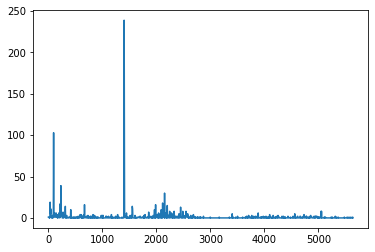

In [5]:
claims2010['Freq'].plot()

We will have to work with the original dataset a little further to accomplish what we want (plot the occurrence of each unique value in the dataset). Let uss combine a `.groupby()` aggregate function with a `.count()` aggregate function. 

In [6]:
FreqDist = claims2010.groupby('Freq').count()[['PolicyNum']]

FreqDist.head()

,PolicyNum
Freq,
0,707
1,209
2,86
3,40
4,18


If you plot the output of this, you’ll get a much nicer line chart.

<AxesSubplot:xlabel='Freq'>

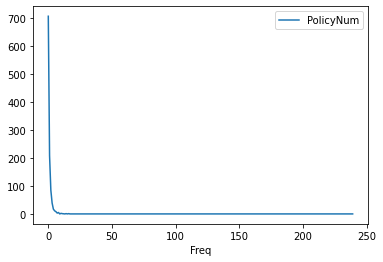

In [7]:
FreqDist.plot()

To turn your line chart into a bar chart, just add the bar keyword. Here we simply count the unique values in the dataset and put that on a bar chart

<AxesSubplot:xlabel='Freq'>

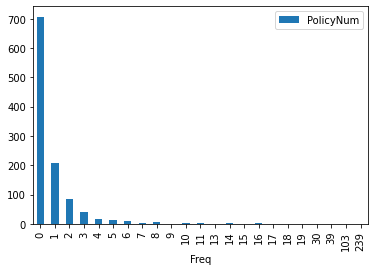

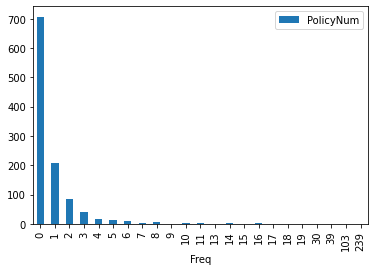

In [8]:
FreqDist.plot(kind='bar')

FreqDist.plot.bar()

However, there is one more step before plotting a histogram: these unique values will be clustered into ranges. Bins or buckets are the names for these ranges, and the default number of bins in Python is 10. As a result of the grouping, your histogram should now look like this:

We will use the `hist` function that is built into pandas. It is very simple to turn your pandas dataframe into a histogram once you have the values in it.

The `hist` function automatically does several of the useful tasks:

1. It does the grouping.

2. It does the counting. 

3. It plots a histogram for each column in your dataframe that has numerical values in it.

**Note:** You can change the number of bins/buckets from the default of 10 by setting a parameter, for example `bins=20`.

array([[<AxesSubplot:title={'center':'Freq'}>]], dtype=object)

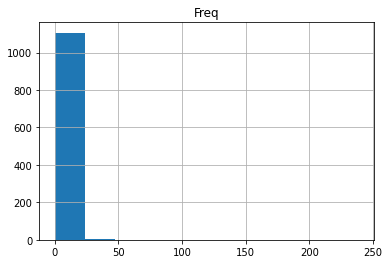

In [9]:
claims2010[['Freq']].hist()

**Note** one of an important tasks is to find a model (perhaps a statistical distribution) that adequately fits this claim frequency distribution)  

array([[<AxesSubplot:title={'center':'Freq'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

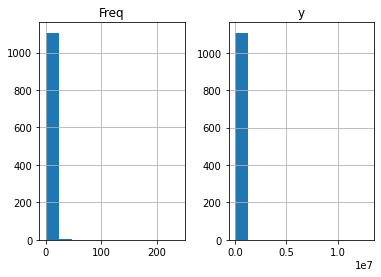

In [10]:
claims2010[['Freq','y']].hist()

Next we will focus on claim severity. 

A common method for determining the severity distribution is to look at the distribution of the sample of 1,377 claims. Another common approach is to look at **the distribution of average claims among policyholders who have made claims**. There were 403 (=1110-707) such policyholders in our 2010 sample.

**Exercise** 

1. Create a table that summarizes the sample distribution of average severities from the 403 policyholders who made a claim.

2. Use `hist` to plot the distribution of positive average severities. What conclusion can we draw from the plot?

3. Plot the distribution of positive average severities in logarithmic units 

array([[<AxesSubplot:title={'center':'yAvg'}>]], dtype=object)

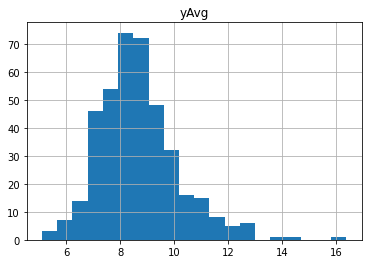

In [11]:
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]
output = claims2010[['yAvg']]

output.apply(np.log).hist(bins=20)
#claims2010['lnyAvg'] = claims2010['yAvg'].apply(np.log)
#claims2010['lnyAvg'] = np.log(claims2010['yAvg'])

**Note** Examples of various plots from the widely-used packages can be seen on the following links. The pages provide access to the entire picture and source code for any image.

* matplotlib https://matplotlib.org/stable/gallery/index.html

* seaborn
https://seaborn.pydata.org/examples/index.html


## Plot a Histogram in Python using Matplotlib

To plot a histogram in Python using Matplotlib, use the following command:

Text(0.5, 1.0, 'Distribution of Positive Average Severities')

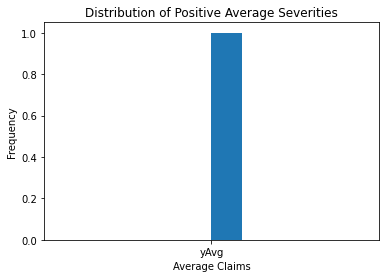

In [12]:
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]
output = claims2010[['yAvg']]

import matplotlib.pyplot as plt
plt.hist(output, bins = 10)
plt.xlabel('Average Claims')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Average Severities')

The image above shows more information about the sample claim distribution, revealing a distribution that is dominated by this single large claim, making the histogram useless. 

Even when the large claim is removed, the distribution remains skewed to the right. Working with claims in logarithmic units, especially for graphical reasons, is a widely acknowledged practice.

The following figure in the right-hand panel is considerably easier to read.

Text(0.5, 1.0, 'Distribution of Positive Average Severities')

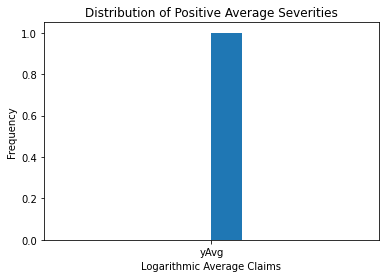

In [13]:
plt.hist(np.log(output), bins = 10)
plt.xlabel('Logarithmic Average Claims')
plt.ylabel('Frequency')
plt.title('Distribution of Positive Average Severities')

## Using ggplot and Python to Create Your First Plot

You will learn how to construct data visualizations using **ggplot** in Python using a **grammar of graphics**. A grammar of graphics is a high-level tool for creating data displays in a consistent and efficient manner. It abstracts the majority of low-level details, **allowing you to concentrate on producing useful and beautiful data visualizations**.

A graphics grammar is provided by a number of Python libraries. We focus on **plotnine** since it is the most developed. 

Plotnine is based on the R programming language's **ggplot2**, thus if you are familiar with R, you may think of plotnine as the Python counterpart of ggplot2.

The first example of plotnine being used to plot the distribution of positive average severities is seen below.

In [14]:
# We add the logarithms of claim average into the claims dataset. 

claims['lnyAvg'] = np.log(claims[claims['Freq']>=1]['yAvg'])

In [15]:
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]

In [16]:
from plotnine import *

(
    ggplot(claims2010)  # What data to use
    + aes(x='lnyAvg')  # What variable to use
    + geom_histogram(bins = 20)  # Geometric object to use for drawing
)

ModuleNotFoundError: No module named 'plotnine'

### Building Your First Plot With ggplot and Python

You will learn how to use ggplot in Python to create your first data visualization.

The approach of making visuals with ggplot2 is intuitively based on **The Grammar of Graphics** (where the gg comes from).

This is comparable to how understanding grammar can help a beginner build hundreds of distinct sentences without having to memorize each one.

We will be able to make hundreds of different plots using ggplot2 by combining three basic components:

* **a data set**, 

* **geoms** are visual marks that represent data points. There are several geometries including 

  + scatterplot, 
  
  + barplot, 
  
  + histogram, 
  
  + smooth densities, 
  
  + qqplot, and 
  
  + boxplot.

* **aesthetic mapping**  describe how properties of the data (variables) connect with features of the graph, such as distance along an axis, size, or colour.


Visit the following website for additional information on plotnine and gallery:

https://plotnine.readthedocs.io/en/stable/

The claims dataset is plotted in this short code sample. Here's a brief breakdown of what's going on:

* Line 1: You use ggplot() to build a plot object and feed the claims DataFrame to the constructor.

* Line 2: The variable to utilize for each axis, in this case **lnyAvg**, is set with aes().

* Line 3: You use the geom_histogram() function to tell the chart to draw as a histogram.

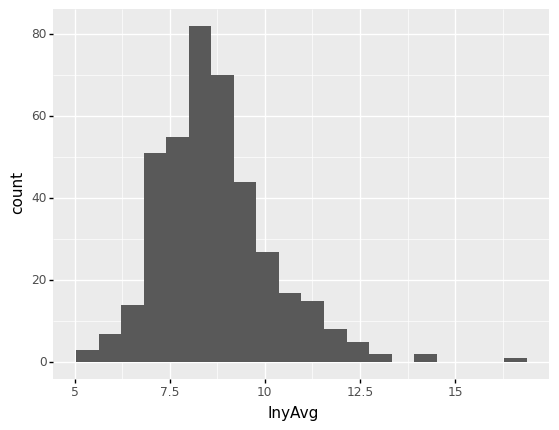

<ggplot: (311587285)>

In [28]:
(
    ggplot(claims2010)  # What data to use
    + aes(x='lnyAvg')  # What variable to use
    + geom_histogram(bins = 20)  # Geometric object to use 
)

You'll also learn about the following optional components:

1. **Statistical transformations** define computations and aggregations to be made to it before plotting data.

2. During the mapping from data to aesthetics, **scales** do some transformation. A logarithmic scale, for example, can be used to better represent specific elements of your data.

3. **Facets** let you divide data into groups depending on specific qualities, then plot each group in its own panel within the same visual.

4. The position of items is mapped to a 2D graphical place in the plot using **coordinate systems**. For example, if it makes more sense in the graphic you're creating, you can choose to reverse the vertical and horizontal axes.

5. **Themes** can be used to modify colors, fonts, and shapes are just a few of the visual aspects 

Do not worry if you are not sure what each component means right now. Throughout this chapter, you will learn more about them.


#### Geometries

In plotnine we create graphs by adding layers. Layers can define geometries, compute summary statistics, define what scales to use, or even change styles. 

To add layers, we use the symbol `+`. In general, a line of code will look like this:

`ggplot(data) + LAYER 1 + LAYER 2 + ... + LAYER N`

Usually, the first added layer defines the geometry. For a scatterplot, the function used to create plots with
this geometry is `geom_point`. 

For `geom_point` to run properly we need to provide data and a mapping. 

The figure below shows a scatter plot (relationship) between the coverage and the total claims.

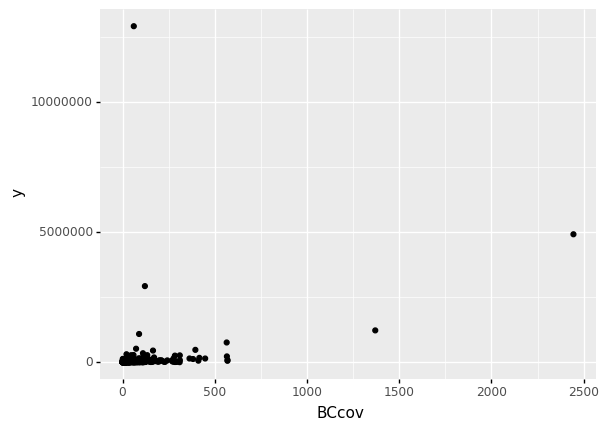

<ggplot: (306193581)>

In [31]:
claims = pd.read_csv('/Users/Kaemyuijang/SCMA248/Data/claimsNewFormat.csv')

# Here we express the coverage of building and contents in millions of dollars
claims['BCcov'] = claims['BCcov']/(10**6)
claims2010 = claims[(claims['Year']==2010) &  (claims['Freq'] >= 1)]

(
    ggplot(data = claims2010)  # What data to use
    + geom_point(aes(x = 'BCcov',y = 'y'))  # Geometric object to use for drawing
)

#### Aesthetic mappings

The next step is to decide which variable you'll use for each axis in your graph. You must tell plotnine which variables you want to include in the visual because each row in a DataFrame can have several fields.

Data variables are mapped to graphical features such as 2D position and color by aesthetics. 

In other words, aesthetic mappings describe how properties of the data (variables) connect with features of the graph, such as distance along an axis, size, or colour. 

The `aes` function connects data with what we see on the graph by defining aesthetic mappings.

The code, for example, creates a graph with **BCcov** (coverages (in millions)) on the x-axis and **claims** on the y-axis:

#### Adding more arguments
A second layer in the plot we wish to make involves adding a label to each point to identify the entity type. 

The `geom_label` and `geom_text` functions permit us to add text to the plot **with** and **without** a rectangle behind the text, respectively.

Because each point (each claim in this case) has a label (type of local government entities), we need an aesthetic mapping to make the connection between points and labels. 

By reading the help file, we learn that we supply the mapping between point and label through the label argument of `aes`. So the code looks like this:


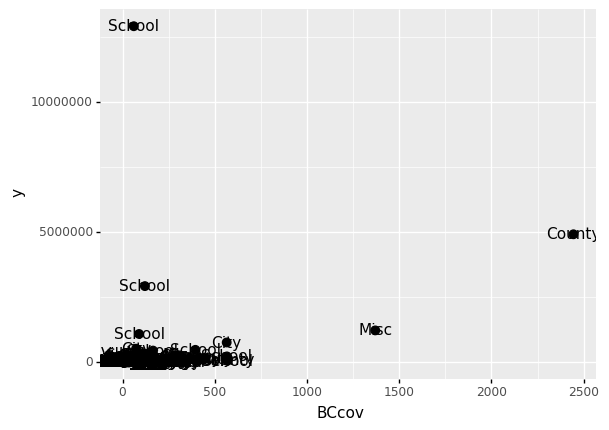

<ggplot: (306227937)>

In [34]:
(
    ggplot(data = claims2010)  # What data to use
    + geom_point(aes(x = 'BCcov',y = 'y'), size = 3)  # Geometric object to use for drawing
    + geom_text(aes(x = 'BCcov', y = 'y', label = 'Type'))
)

`size` is not a mapping: whereas mappings use data from specific observations and need to be inside `aes()`, operations we want to affect all the points the same way do not need to be included inside `aes`.

If we read the help file for `geom_text`, we see the `nudge_x` argument, which moves the text slightly to the right or to the left:

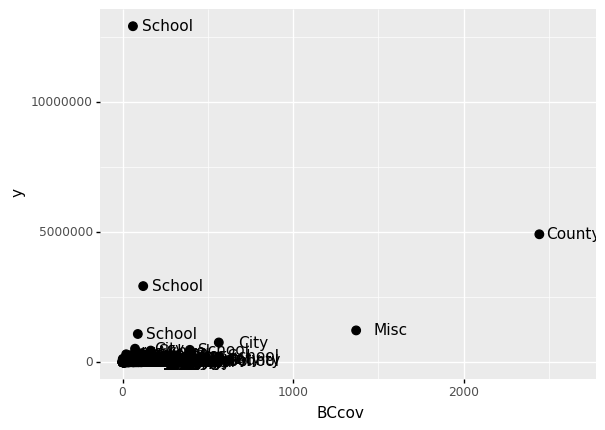

<ggplot: (320597253)>

In [37]:
(
    ggplot(data = claims2010)  # What data to use
    + geom_point(aes(x = 'BCcov',y = 'y'), size = 3)  # Geometric object to use for drawing
    + geom_text(aes(x = 'BCcov', y = 'y', label = 'Type'), nudge_x = 200)
)

## Global and local aesthetic mappings

In the previous line of code, we define the mapping `aes(x = 'BCcov', y = 'y')` twice, once in each geometry. 

We can avoid this by using a global aesthetic mapping. 

We can do this when we define the blank slate ggplot object. 

If we define a mapping in ggplot, all the geometries that are added as layers will default to this mapping. 
We redefine p:

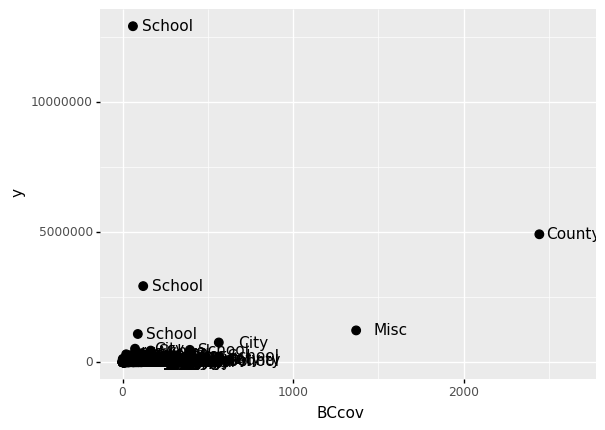

<ggplot: (321703573)>

In [45]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type')

(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
)

In the code above, we keep the `size` and `nudge_x` arguments in `geom_point` and `geom_text`, respectively, because we want to only increase the size of points and only nudge the labels. 

If we put those arguments in `aes` then they would apply to both plots. 
Also note that the `geom_point` function does not need a label argument and therefore ignores that aesthetic. 

#### Scales

First, our desired scale in claims is in log-scale. This is not the default, so this change needs to be added through a scales layer. 

A quick look at the cheat sheet reveals the `scale_y_continuous` function lets us control the behavior of scale. We use it like this:

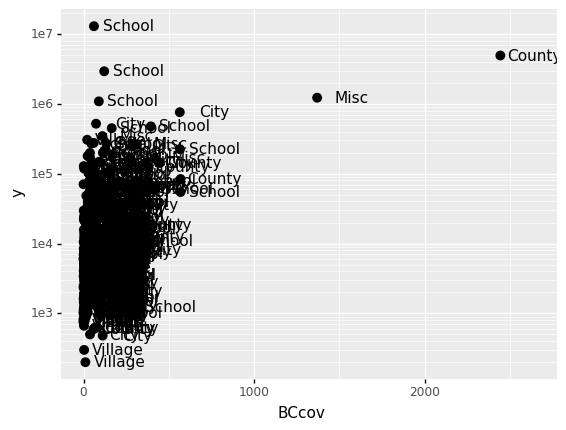

<ggplot: (309737009)>

In [63]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type')

(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
    + scale_y_continuous(trans = "log10")
)

Alternative to the `scale_y_continuous`, we can use the function `scale_y_log10`, which we can use to rewrite the code like this:  

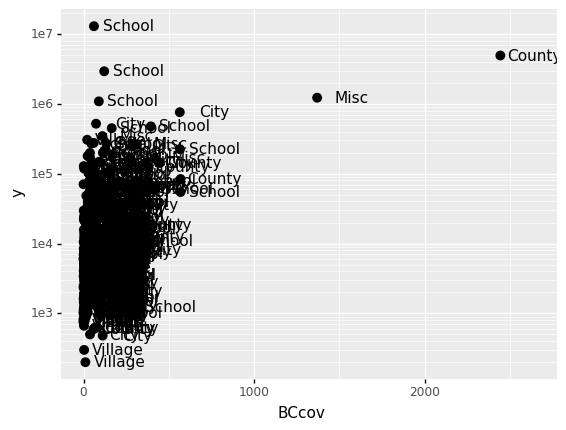

<ggplot: (320855017)>

In [65]:
(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
    + scale_y_log10()
)

## Labels and titles

Similarly, the cheat sheet quickly reveals that to change labels and add a title, we use the following functions:

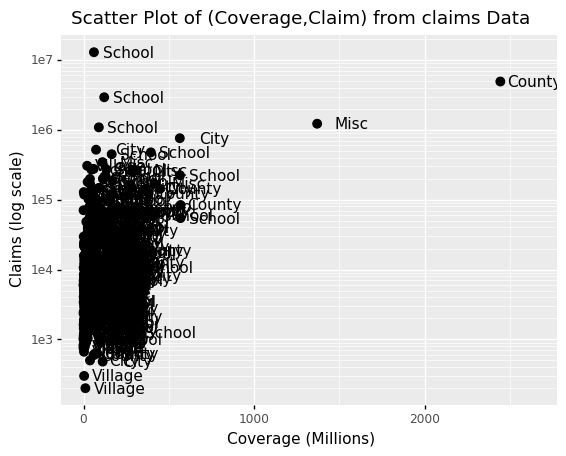

<ggplot: (321717417)>

In [66]:
(
    p 
    + geom_point(size = 3) 
    + geom_text(nudge_x = 200)
    + scale_y_log10()
    + xlab("Coverage (Millions)") 
    + ylab("Claims (log scale)") 
    + ggtitle("Scatter Plot of (Coverage,Claim) from claims Data")
)

## Categories as colors

We can change the color of the points using the `colour` argument in the `geom_point` function. 

To facilitate demonstration of new features, we will redefine `p` to be everything except the points layer:

In [69]:
p = ggplot(data = claims2010) + aes(x = 'BCcov', y = 'y', label = 'Type') + geom_point(size = 3)  + geom_text(nudge_x = 200) + scale_y_log10() + xlab("Coverage (Millions)")  + ylab("Claims (log scale)")  + ggtitle("Scatter Plot of (Coverage,Claim) from claims Data")

and then test out what happens by adding different calls to `geom_point`. We can make all the points blue by adding the color argument:

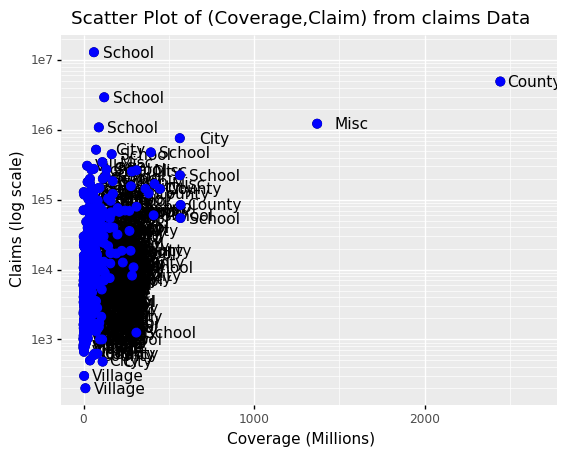

<ggplot: (321056149)>

In [70]:
(p + geom_point(size = 3, colour ="blue"))


This, of course, is not what we want. We want to assign color depending on the entity type. 

A nice default behavior of ggplot2 is that if we assign a **categorical** variable to colour, it automatically assigns a different color to each category and also adds a legend.

Since the choice of colour is determined by a feature of each observation, this is an aesthetic mapping. 

To map each point to a color, we need to use `aes`. We use the following code:

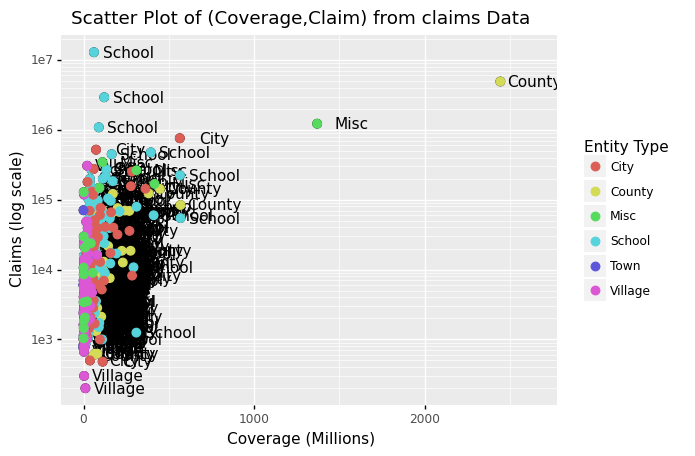

<ggplot: (311056725)>

In [77]:
(p + geom_point(aes(colour='Type'), size = 3)  + scale_color_discrete(name = "Entity Type"))